<a href="https://colab.research.google.com/github/atoothman/Data-71200-Projects-/blob/main/DATA_71200_Project_3_Glass_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 71200 - Project 3 Glass Identification

This project involves the analysis of the [Glass Identification](https://archive.ics.uci.edu/dataset/42/glass+identification) dataset, sourced from the UC Irvine Machine Learning Repository. The dataset contains information on 6 types of glass defined in terms of their oxide content. The study of classification of types of glass was motivated by criminological investigation and broken glass left at crime scenes.

**Dataset Description**

1. ID Number
2. RI (refractive Index)
3. Na (Sodium)
4. MG (Magnesium)
5. Al (Aluminum)
6. Si (Silicon)
7. K (Potassium)
8. Ca (Calcium)
9. Ba (Barium)
10. Fe (Iron)
11. Type of Glass (Class)
      *   building_windows_float_processed
      *   building_windows_non_float_processed
      *   vehicle_windows_float_processed
      *   vehicle_windows_non_float_processed (none in this database)
      *   containers
      *   tableware
      *   headlamps

9 Features are included in the dataset. There are 8 continuous features, 1 integer feature and 1 categorical feature.

The categorical feature Type of Glass/"Class" is divided into seven distinct categories (listed above) which are associated with the product the glass created. "Class" will serve as the target in this project.

**Objective**
Project 3 is building off the work of [Project 1](https://colab.research.google.com/drive/1i24JixOkYadlSOzYcKsIA-W-WyRru1XJ#scrollTo=VQdeW82USQMA) & [Project 2](https://colab.research.google.com/drive/14o56wCeCk9yekREo-ReIgmDQYlM0dmbh).

The objective of this project is the application of unsupervised learning techniques on the Glass Identification dataset.


# Step 1: Load data including testing/training split from Project 1


*   Your testing and training split should be balanced
*   Your data should be clean and missing data should be addressed
*   All appropriate variables are converted to categorical variables (as ordinal or one hot)
*   Any necessary feature scaling should be performed
*   YOU SHOULD ONLY WORK ON YOUR TRAINING SET











### Load data from project 1 and drop ID Column

Dropped ID column as it contained sequential numbers for the dataset which is redundant information and provided by the index column

In [1]:
import pandas as pd

# Raw URL of the dataset file on GitHub
url = "https://raw.githubusercontent.com/atoothman/Data-71200-Projects-/main/glass%2Bidentification/glass.data"


# Load the dataset into DataFrame
glass_df = pd.read_csv(url, header=None, index_col=False, names=[
    'ID', 'Refractive Index', 'Sodium', 'Magnesium', 'Aluminum',
    'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Class'])

# Display the DataFrame before dropping 'ID'
print("Before dropping 'ID':")
print(glass_df.head())

# Drop the 'ID' column
glass_df.drop(columns=['ID'], inplace=True)

# Display the DataFrame after dropping 'ID'
print("\nAfter dropping 'ID':")
print(glass_df.head())

Before dropping 'ID':
   ID  Refractive Index  Sodium  Magnesium  Aluminum  Silicon  Potassium  \
0   1           1.52101   13.64       4.49      1.10    71.78       0.06   
1   2           1.51761   13.89       3.60      1.36    72.73       0.48   
2   3           1.51618   13.53       3.55      1.54    72.99       0.39   
3   4           1.51766   13.21       3.69      1.29    72.61       0.57   
4   5           1.51742   13.27       3.62      1.24    73.08       0.55   

   Calcium  Barium  Iron  Class  
0     8.75     0.0   0.0      1  
1     7.83     0.0   0.0      1  
2     7.78     0.0   0.0      1  
3     8.22     0.0   0.0      1  
4     8.07     0.0   0.0      1  

After dropping 'ID':
   Refractive Index  Sodium  Magnesium  Aluminum  Silicon  Potassium  Calcium  \
0           1.52101   13.64       4.49      1.10    71.78       0.06     8.75   
1           1.51761   13.89       3.60      1.36    72.73       0.48     7.83   
2           1.51618   13.53       3.55      1.54    

### Show info and description of data

In [2]:
# Display glass_data DF and check that all features are listed
display(glass_df)

# Show info on glass_df
print("Info on glass_df:")
glass_df.info()
print()

# Show description of glass_df
print("Description of glass_df:")
glass_df.describe()

,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Info on glass_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive Index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminum          214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Class             214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

Description of glass_df:


,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Divide into training and testing set

To create a balanced split StratifiedShuffleSplit will be utilized below with a 20% test size and 80% training size

In [3]:
# Utilize scikitlearn for a stratify split
from sklearn.model_selection import StratifiedShuffleSplit

# Separate the features (X) and the target variable (y) aka Class
X = glass_df.drop('Class', axis=1)
y = glass_df['Class']

# Create StratifiedShuffleSplit with 1 split, 20% test size, 80% training and random state 42
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Split data
for train_index, test_index in split.split(X, y):
   X_train = X.iloc[train_index]
   X_test = X.iloc[test_index]
   y_train = y.iloc[train_index]
   y_test = y.iloc[test_index]

# Check to confirm successful 80 : 20 split
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (171, 9)
X_test: (43, 9)
y_train: (171,)
y_test: (43,)


Confirming the split was successful. The training set has 80% of the original 214 instances, while the testing set has 20% of the original instances. 9 in the X-train and X_test show the number of columns/features.

### Check for missing values in the training and testing set

In [4]:
# Checking missing values in training set

# Check for missing values in X_train
missing_values = X_train.isnull().sum()

# Print missing values in X_train
print("Missing Values in X_train:")
print(missing_values)
print()

# Check for missing values in y_train
missing_values = y_train.isnull().sum()

# Print missing values in y_train
print("Missing Values in y_train:")
print(missing_values)

# Checking missing values in test set

# Check for missing values in X_test
missing_values = X_test.isnull().sum()

# Print missing values in X_test
print("Missing Values in X_test:")
print(missing_values)
print()

# Check for missing values in y_test
missing_values = y_test.isnull().sum()

# Print missing values in y_test
print("Missing Values in y_test:")
print(missing_values)

Missing Values in X_train:
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
dtype: int64

Missing Values in y_train:
0
Missing Values in X_test:
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
dtype: int64

Missing Values in y_test:
0


0 missing values in training and testing set

### Prepare data: Convert variables and preform feature scaling


The target variable "Class" is already a categorical variable an encoded as an integer: 1, 2, 3, 4, 5, 6, or 7. No need to convert with on hot encoded. No need to convert to ordinal as the classes are associated with glass from a particular object. For example, class 6 is table glass. They are not actually ranked.

In [5]:
# Target is already encoded as integer
display(y_train)

201    7
38     1
30     1
48     1
71     2
      ..
198    7
63     1
157    3
150    3
178    6
Name: Class, Length: 171, dtype: int64

Feature Scaling on X_train, no scaling needed for y_train

In [6]:
# Feature Scaling on X_train, no scaling needed for y_train

# Scaling method below used from class 6 lab

# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# Subtract the min, divide by range
# Afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("X_train: Minimum for each feature\n", X_train_scaled.min(axis=0))
print()
print("X_train: Maximum for each feature\n", X_train_scaled.max(axis=0))
print()

X_train: Minimum for each feature
 Refractive Index    0.0
Sodium              0.0
Magnesium           0.0
Aluminum            0.0
Silicon             0.0
Potassium           0.0
Calcium             0.0
Barium              0.0
Iron                0.0
dtype: float64

X_train: Maximum for each feature
 Refractive Index    1.0
Sodium              1.0
Magnesium           1.0
Aluminum            1.0
Silicon             1.0
Potassium           1.0
Calcium             1.0
Barium              1.0
Iron                1.0
dtype: float64



Feature Scaling on X_test

In [7]:
# Feature Scaling on X_test, no scaling needed for y_test

# Compute the minimum value per feature on the test set
min_on_testing = X_test.min(axis=0)

# Compute the range of each feature (max - min) on the test set
range_on_testing = (X_test - min_on_testing).max(axis=0)

# Subtract the min, divide by range
# Afterward, min=0 and max=1 for each feature
X_test_scaled = (X_test - min_on_testing) / range_on_testing
print("X_test: Minimum for each feature\n", X_test_scaled.min(axis=0))
print()
print("X_test: Maximum for each feature\n", X_test_scaled.max(axis=0))

X_test: Minimum for each feature
 Refractive Index    0.0
Sodium              0.0
Magnesium           0.0
Aluminum            0.0
Silicon             0.0
Potassium           0.0
Calcium             0.0
Barium              0.0
Iron                0.0
dtype: float64

X_test: Maximum for each feature
 Refractive Index    1.0
Sodium              1.0
Magnesium           1.0
Aluminum            1.0
Silicon             1.0
Potassium           1.0
Calcium             1.0
Barium              1.0
Iron                1.0
dtype: float64


# Step 2: PCA for feature selection

*  Show how many features do you need to retain to capture 95% of the variance
*  Evaluate whether this improves your best-performing model from Project 2

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Fit PCA to data
pca = PCA(n_components=0.95)

# fit on and transforming the training set and then transform the test set
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### PCA (95% variance)

### PCA on supervised learning

PCA feature selection accurately performed as a pre-processing step for supervised learning

In [23]:
# Decision Tree from preprocessed data

model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.65


In [19]:
# keep all the principal components of the data
pca1 = PCA()
# fit PCA model to data
pca1.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca1.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[4.64992829e-01 2.74213171e-01 1.19789288e-01 9.03112789e-02
 3.22091928e-02 1.65603839e-02 1.66203880e-03 2.61653583e-04
 1.64849354e-07]


In [24]:
# keep the components that explain 95% of the variance in the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
X_train_pca4 = pca4.fit_transform(X_train)
# transform data onto the first two principal components
X_test_pca4 = pca4.transform(X_test)


#model=LogisticRegression().fit(X2_train, y2_train)
model3 = DecisionTreeClassifier(random_state=0).fit(X_train_pca4, y_train)

print("Accuracy on training set: {:.2f}".format(model3.score(X_train_pca4, y_train)))
print("Accuracy on test set: {:.2f}".format(model3.score(X_test_pca4, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.67


In [20]:
# keep components to explain 95% of the variance
pca2 = PCA(n_components=0.95)
# fit PCA model to data
pca2.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca2.explained_variance_ratio_)


--------------------Explained variance ratio--------------------
[0.46499283 0.27421317 0.11978929 0.09031128 0.03220919]


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (10).

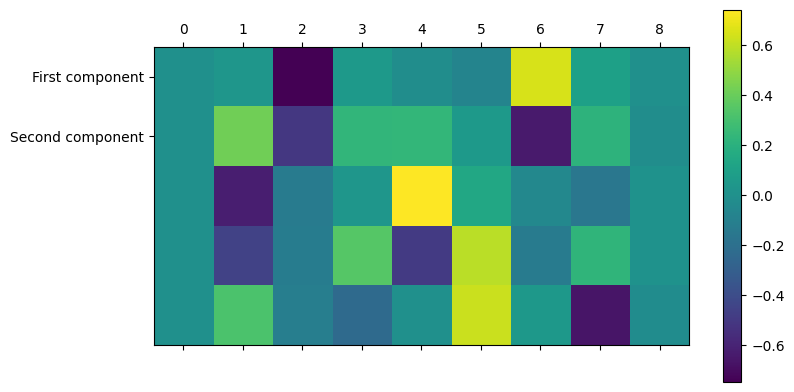

In [28]:
# Feature names for plotting
feature_names = ['Refractive Index', 'Sodium', 'Magnesium', 'Aluminum',
    'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron']

# plot the principal components
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(feat)),
           glass_df, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")


# Step 3: Apply 3-types of clustering on your data and visualize the output of each both with and without PCA run on it first. Calculate both ARI and Silhouette Coefficient for all six of the combinations.


*   k-Means (use an elbow visualization to determine the optimal numbers of clusters)
*   Aggolmerate/Hierarchical
*   DBSCAN









### K-Means run and visualized without PCA

Calculate both ARI and Silhouette Coefficient

### K-Means run and visualized with PCA
Calculate both ARI and Silhouette Coefficient

### K-Means elbow visualization

### Aggolmerate/Hierarchical run and visualized without PCA

Calculate both ARI and Silhouette Coefficient

### Aggolmerate/Hierarchical run and visualized with PCA

Calculate both ARI and Silhouette Coefficient

### DBSCAN run and visualized without PCA

Calculate both ARI and Silhouette Coefficient

### DBSCAN run and visualized with PCA

Calculate both ARI and Silhouette Coefficient